### Implementing HDBSCAN to cluster spending habits of accounts

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import HDBSCAN, DBSCAN
import seaborn as sns

In [2]:
spending_data = pd.read_csv('C:/Users/camer/OneDrive/Documents/Data Science MSc/DSMP/Robust_scaler_proportional_spending_by_account.csv')
spending_data.head()

,Sender account,Alcohol,Bar/Pub,Books,Children,Clothing,Coffee Shop,Eating Out,Electronics,Entertainment,Exercise,High Street,Home,Pet,Supermarket
0,1000.0,-0.436067,1.192195,-0.046148,0.068886,-0.046147,3.110653,0.400514,0.000000,0.400066,0.000000,-0.197594,-0.065277,32.078042,-0.477163
1,1002.0,0.359238,1.661521,-0.071621,0.222322,-0.114548,0.132045,0.487107,0.000000,2.331973,2.194682,-0.143204,-0.225905,0.000000,-0.250066
2,1006.0,0.090749,-0.370402,0.863137,1.003097,-0.137371,1.970801,-0.480472,0.000000,0.634147,0.000000,4.921578,-0.171755,0.000000,-0.485271
3,1018.0,-0.136176,-0.983751,-0.012553,-0.041055,1.614418,-1.036922,0.447596,0.000000,-0.392363,0.000000,4.062763,1.726983,1.687366,-0.251208
4,1053.0,0.805719,-0.246071,-0.071621,0.012636,1.793907,0.242202,1.078945,0.006013,0.752494,0.000000,-0.076002,0.941547,0.000000,-0.384113


Splitting the data into features and targets

In [3]:
X = spending_data.drop('Sender account', axis=1, errors='ignore')

#### Performing dimensionality reduction (UMAP, PCA, t-SNE)

(8142, 2)


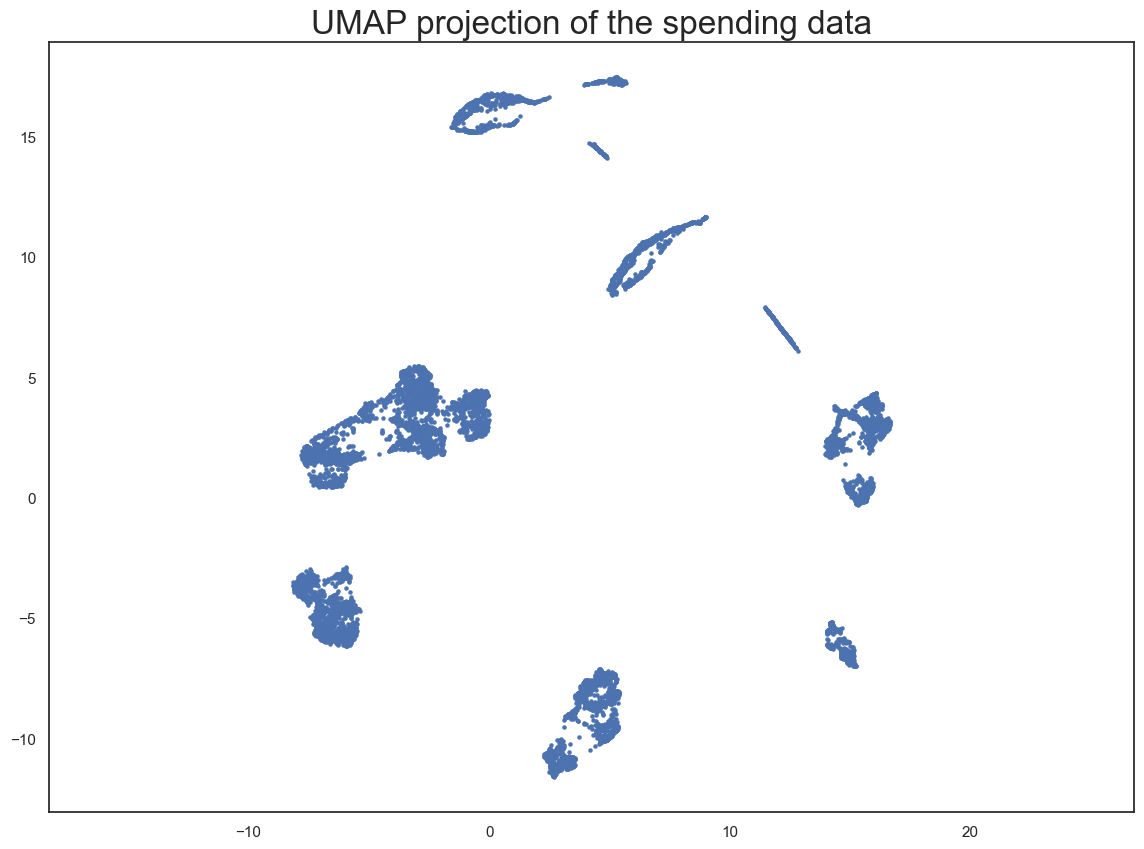

In [38]:
import umap
import matplotlib.pyplot as plt
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

umap_model = umap.UMAP()

spending_umap = umap_model.fit_transform(X)
print(spending_umap.shape)

plt.scatter(
    spending_umap[:, 0],
    spending_umap[:, 1],
        s=5,
)

plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the spending data', fontsize=24);

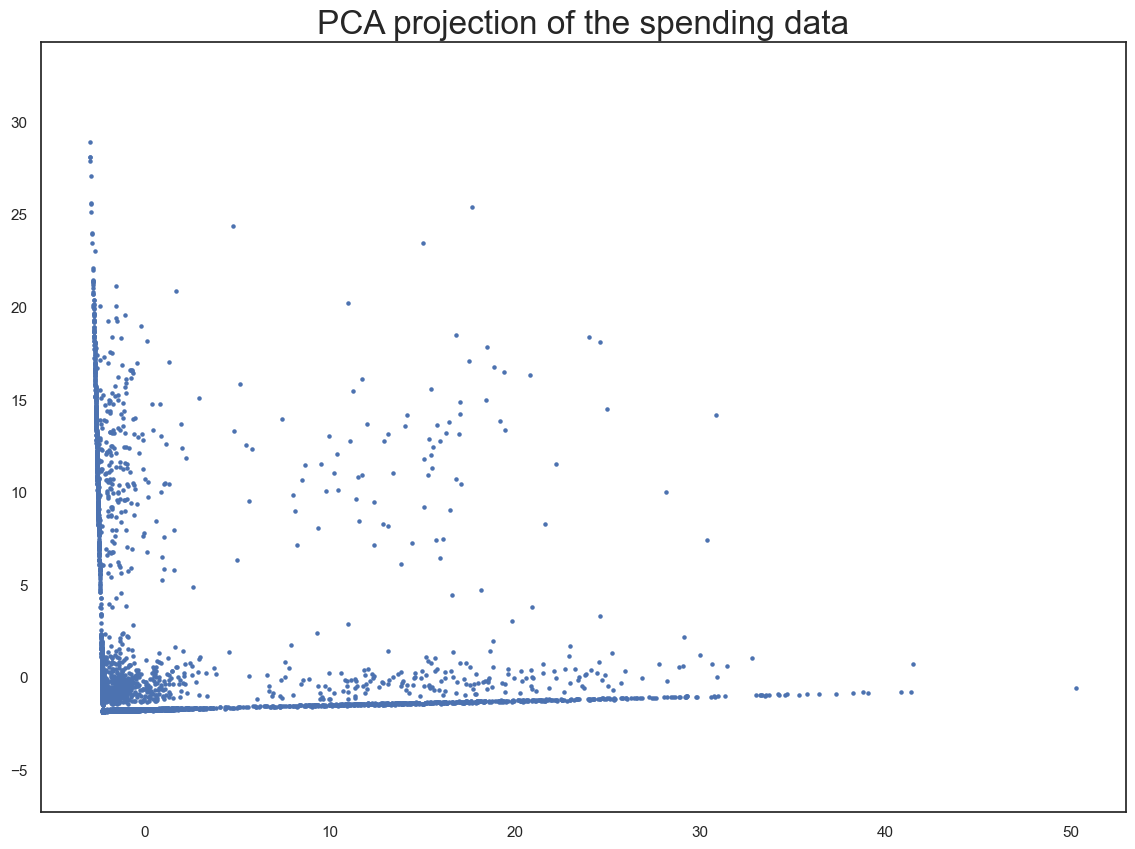

In [5]:
from sklearn.decomposition import PCA
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})
pca = PCA()
spending_pca = pca.fit_transform(X)

plt.scatter(
    spending_pca[:, 0],
    spending_pca[:, 1],
        s=5,
)

plt.gca().set_aspect('equal', 'datalim')
plt.title('PCA projection of the spending data', fontsize=24);

C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


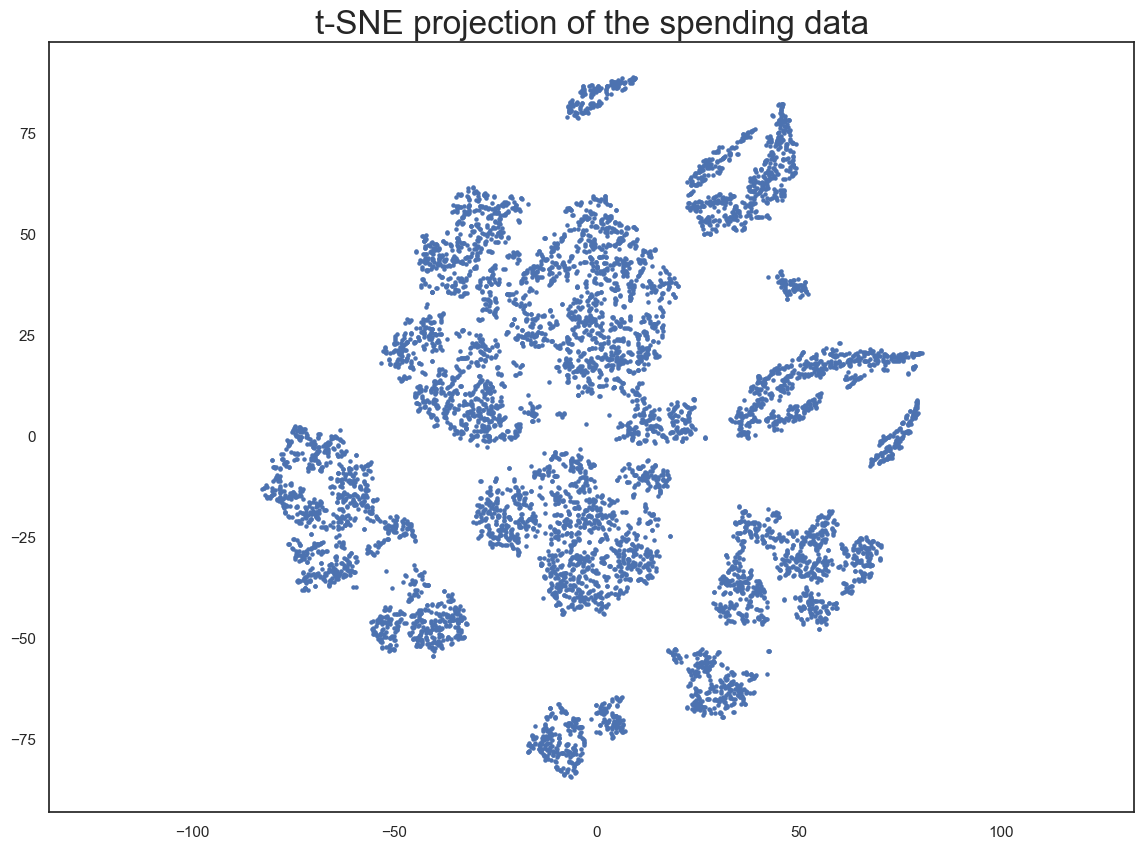

In [6]:
from sklearn.manifold import TSNE

tsne = TSNE()
spending_tsne = tsne.fit_transform(X)

plt.scatter(
    spending_tsne[:, 0],
    spending_tsne[:, 1],
    s=5,
)

plt.gca().set_aspect('equal', 'datalim')
plt.title('t-SNE projection of the spending data', fontsize=24)
plt.show()

#### Clustering with HDBSCAN on data after UMAP 

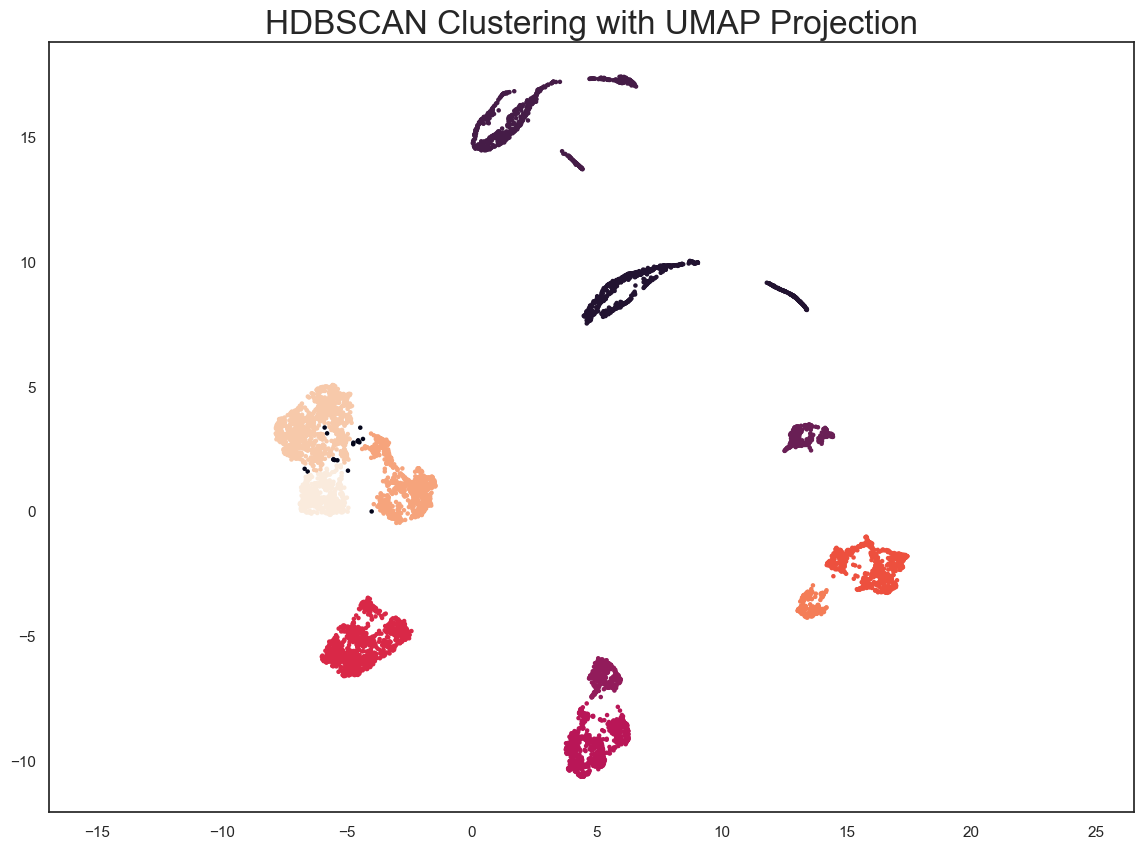

The average silhouette_score is : 0.5652876


In [7]:
from sklearn.metrics import silhouette_score

hdb = HDBSCAN(min_samples=1, min_cluster_size=250)

cluster_labels = hdb.fit_predict(spending_umap)

spending_data['cluster_label'] = cluster_labels

plt.scatter(
    spending_umap[:, 0],
    spending_umap[:, 1],
    s=5,
    c=cluster_labels,  # Assign colors based on cluster labels using the colormap
)

plt.gca().set_aspect('equal', 'datalim')
plt.title('HDBSCAN Clustering with UMAP Projection', fontsize=24)
plt.show()

spending_data['cluster_label'].value_counts()

silhouette_avg = silhouette_score(spending_umap, cluster_labels)

print("The average silhouette_score is :", silhouette_avg)

### Implementing DBSCAN

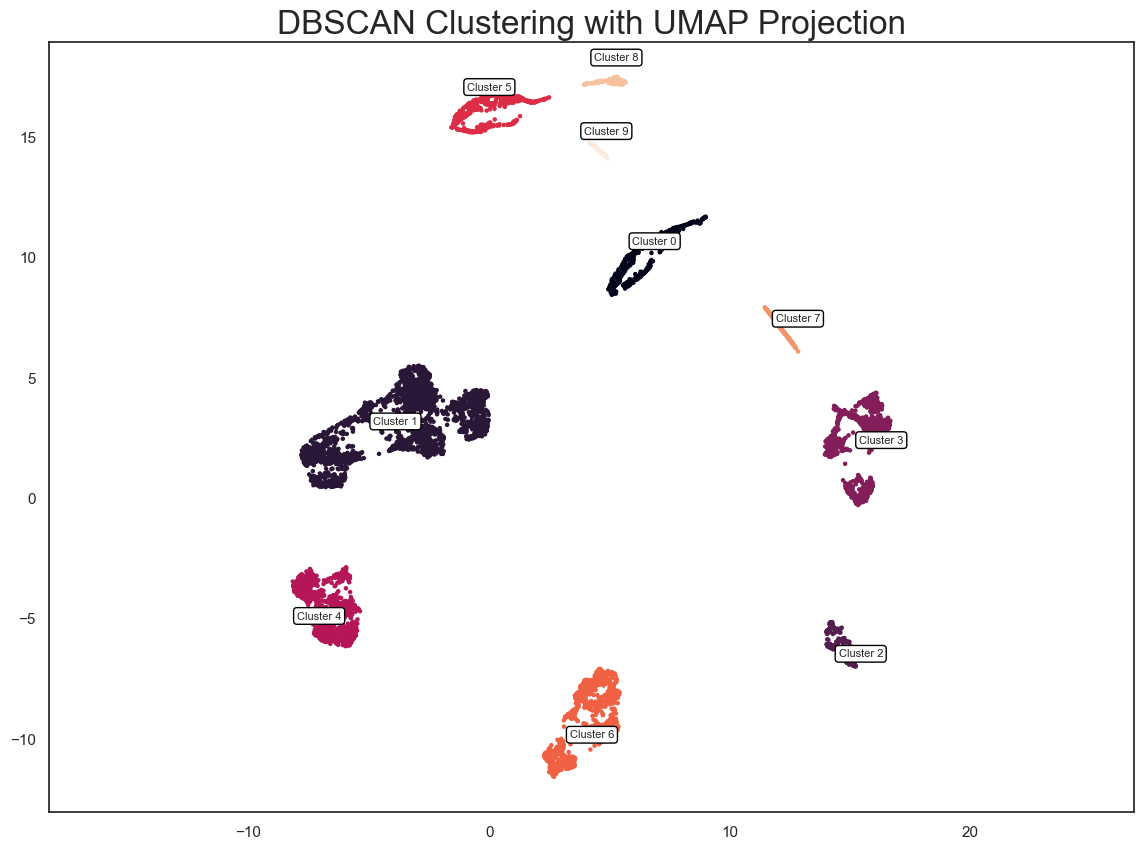

The average silhouette_score is : 0.7127379


In [39]:
from sklearn.metrics import silhouette_score

db = DBSCAN(min_samples=10, eps=1)

cluster_labels = db.fit_predict(spending_umap)

spending_data['cluster_label'] = cluster_labels

plt.scatter(
    spending_umap[:, 0],
    spending_umap[:, 1],
    s=5,
    c=cluster_labels,  # Assign colors based on cluster labels using the colormap
)

for label in np.unique(cluster_labels):
    if label == -1:  # Label noise points separately
        continue
    cluster_center = np.mean(spending_umap[cluster_labels == label], axis=0)
    plt.annotate(
        f'Cluster {label}',
        xy=cluster_center,
        xytext=(cluster_center[0], cluster_center[1]),
        textcoords="offset points",
        ha='center',
        va='center',
        fontsize=8,
        bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white')
    )

plt.gca().set_aspect('equal', 'datalim')
plt.title('DBSCAN Clustering with UMAP Projection', fontsize=24)
plt.show()
spending_data['cluster_label'].value_counts()


silhouette_avg = silhouette_score(spending_umap, cluster_labels)

print("The average silhouette_score is :", silhouette_avg)

#### Plotting accounts within UMAP clusters

In [61]:
cluster_of_interest = 5

accounts_in_cluster = spending_data[spending_data['cluster_label'] == cluster_of_interest]
sample_accounts = accounts_in_cluster.sample(n=6)

sample_accounts.set_index('Sender account', inplace=True)
sample_accounts.drop('cluster_label', axis=1)
sample_accounts

,Alcohol,Bar/Pub,Books,Children,Clothing,Coffee Shop,Eating Out,Electronics,Entertainment,Exercise,High Street,Home,Pet,Supermarket,cluster_label,cluster_name
Sender account,,,,,,,,,,,,,,,,
59183.0,-0.604383,-0.035922,1.321738,-0.098205,0.216992,-1.026827,-0.084077,0.0,0.490374,14.677673,-0.066528,-0.073524,0.000000,0.689494,5,High Children
96425.0,0.463769,-0.304598,1.249348,-0.078476,0.111108,2.205486,-0.666302,0.0,-0.531707,11.918186,-0.197594,-0.159341,0.687345,0.599057,5,High Children
92715.0,0.167295,-0.904795,-0.052152,-0.077771,0.428572,-0.792184,0.534553,0.0,-0.040631,10.732506,0.405622,0.406695,1.446045,0.911356,5,High Children
5486.0,0.969195,0.017281,1.440890,-0.098205,1.230454,0.143133,0.436416,0.0,0.213248,11.441668,-0.015282,0.753496,2.700430,-0.377774,5,High Children
28551.0,0.163003,0.541908,1.481444,-0.044741,0.109791,-0.827626,1.096378,0.0,2.058168,15.769967,0.526620,-0.225905,2.088446,-0.334504,5,High Children
44320.0,0.641706,-0.149695,0.956320,1.230562,0.150552,1.639880,-0.991914,0.0,0.572909,9.623742,-0.049094,0.447298,0.143679,-0.097152,5,High Children


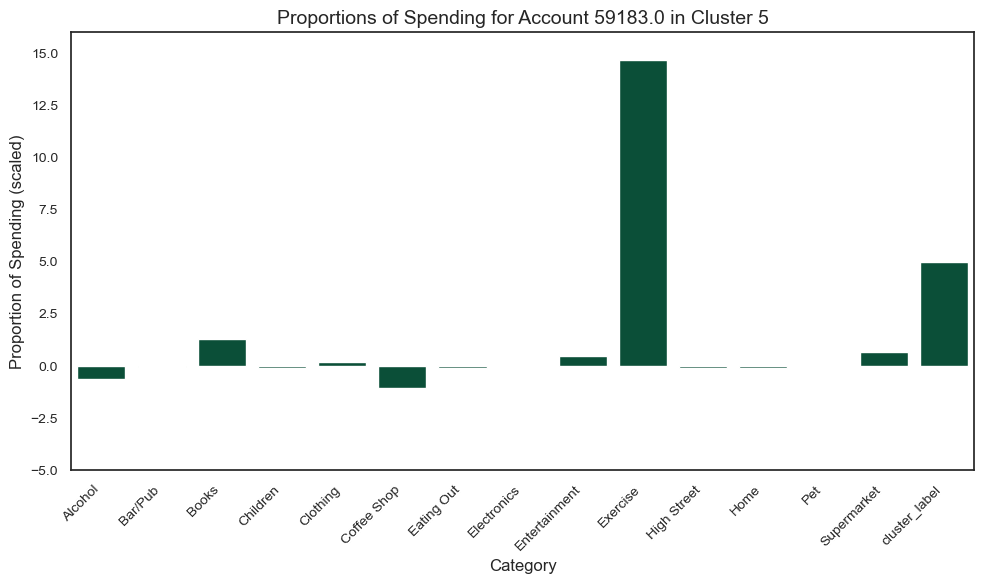

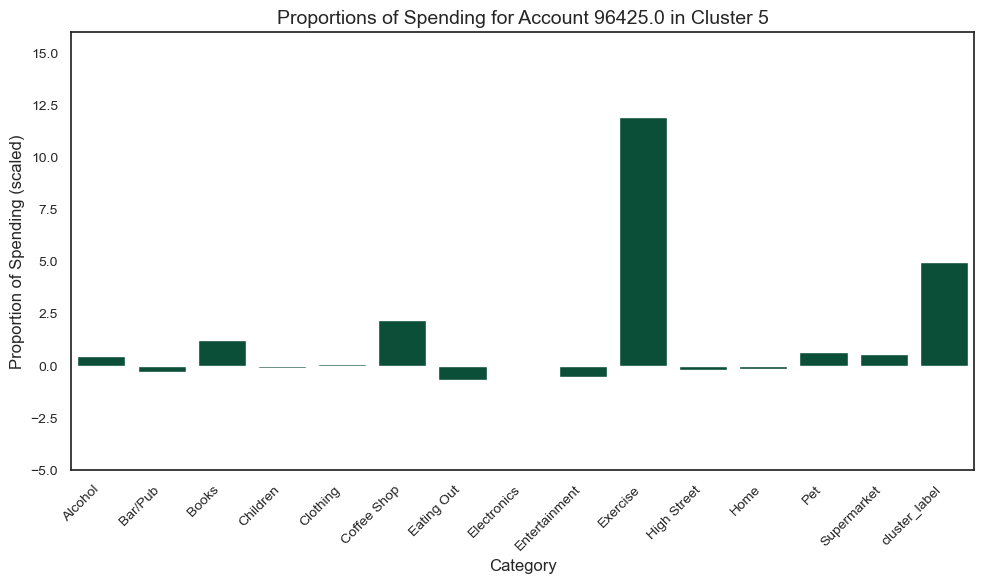

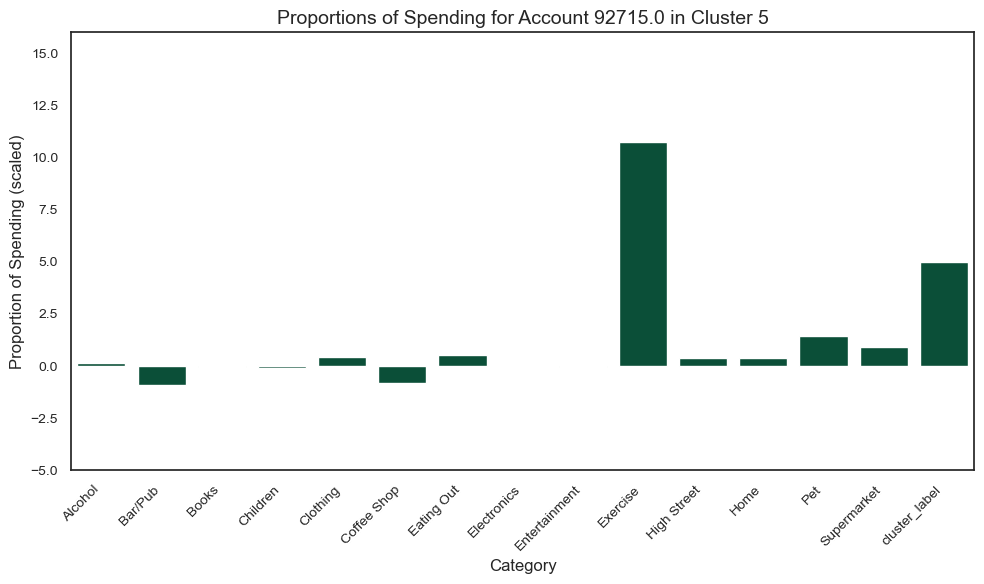

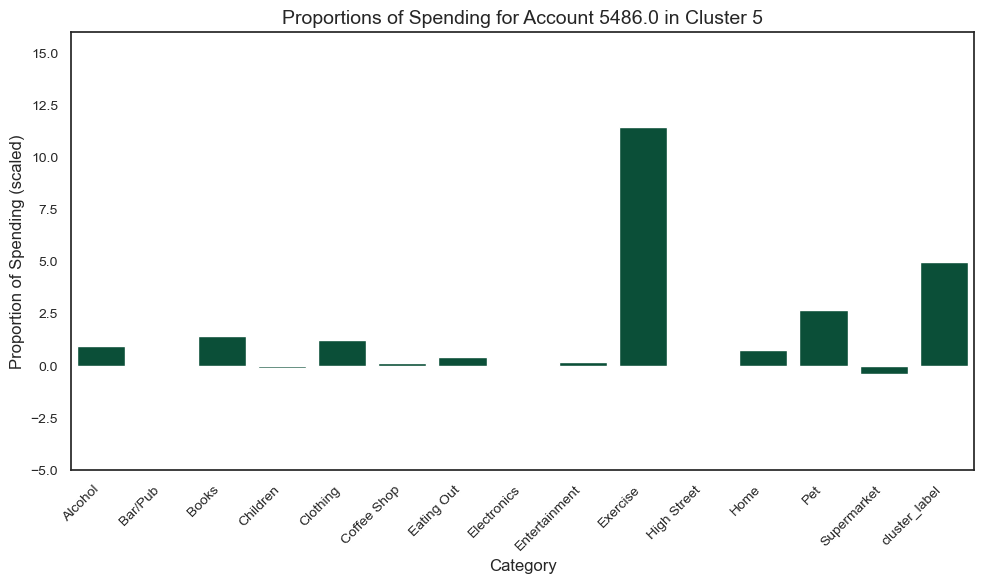

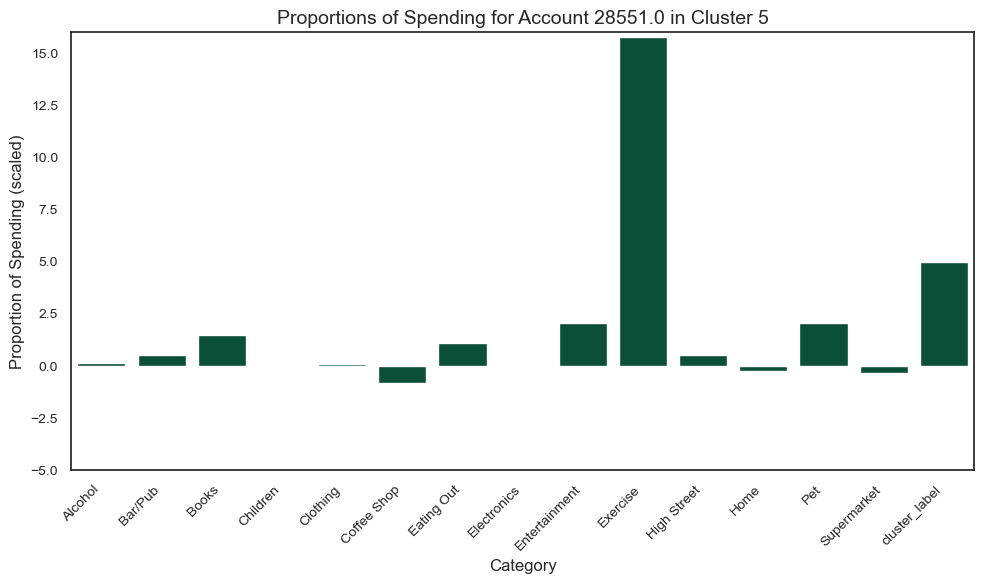

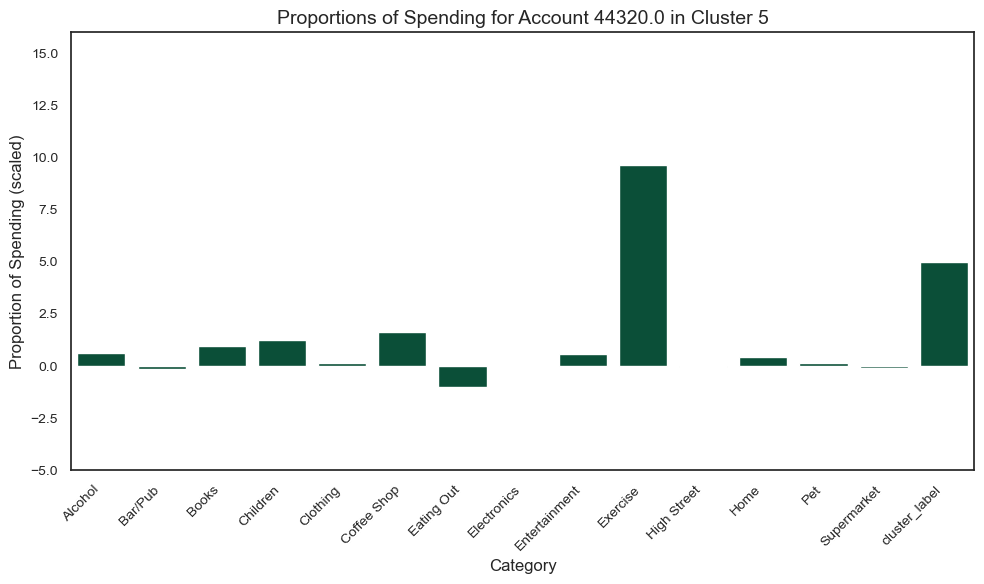

In [64]:
for account_name, account_data in sample_accounts.iterrows():
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=account_data.index[:-1], y=account_data.values[:-1], color='#005a3c')
    plt.title(f'Proportions of Spending for Account {account_name} in Cluster {cluster_of_interest}', fontsize=14)
    plt.xlabel('Category', fontsize=12)
    plt.ylabel('Proportion of Spending (scaled)', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.ylim(-5, 16)
    plt.tight_layout()
    plt.show()

Labelling clusters with insights

In [11]:
cluster_names = [
    'High Coffee Low Clothing Low High-Street',
    'High Bar/Pub',
    'Low Supermarket High Highstreet High Children',
    'Low Supermarket High Highstreet',
    'High Clothing High Home',
    'High Children',
    'High Clothing High Coffeeshop',
    'Low Supermarket High Highstreet High Bar/Pub',
    'High Clothing High Children Low Bar/Pub',
    'Low Supermarket High Highstreet High Coffeshop',
    'High Children High Coffeeshop',
    'Low Supermarket High Highstreet High Coffeshop High Clothing'
]

In [12]:
spending_data['cluster_name'] = spending_data['cluster_label'].apply(lambda x: cluster_names[x])

In [13]:
spending_data

,Sender account,Alcohol,Bar/Pub,Books,Children,Clothing,Coffee Shop,Eating Out,Electronics,Entertainment,Exercise,High Street,Home,Pet,Supermarket,cluster_label,cluster_name
0,1000.0,-0.436067,1.192195,-0.046148,0.068886,-0.046147,3.110653,0.400514,0.000000,0.400066,0.000000,-0.197594,-0.065277,32.078042,-0.477163,0,High Coffee Low Clothing Low High-Street
1,1002.0,0.359238,1.661521,-0.071621,0.222322,-0.114548,0.132045,0.487107,0.000000,2.331973,2.194682,-0.143204,-0.225905,0.000000,-0.250066,1,High Bar/Pub
2,1006.0,0.090749,-0.370402,0.863137,1.003097,-0.137371,1.970801,-0.480472,0.000000,0.634147,0.000000,4.921578,-0.171755,0.000000,-0.485271,2,Low Supermarket High Highstreet High Children
3,1018.0,-0.136176,-0.983751,-0.012553,-0.041055,1.614418,-1.036922,0.447596,0.000000,-0.392363,0.000000,4.062763,1.726983,1.687366,-0.251208,3,Low Supermarket High Highstreet
4,1053.0,0.805719,-0.246071,-0.071621,0.012636,1.793907,0.242202,1.078945,0.006013,0.752494,0.000000,-0.076002,0.941547,0.000000,-0.384113,4,High Clothing High Home
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8137,100931.0,2.238053,0.371659,0.687757,0.025266,0.015294,-0.115198,-0.762482,0.010954,1.655538,18.526783,3.638282,-0.225905,0.000000,-0.454098,8,High Clothing High Children Low Bar/Pub
8138,100934.0,0.623116,0.004861,1.208287,-0.098205,-0.040305,-0.128295,-0.428384,0.000000,-0.110248,0.000000,-0.162217,-0.071772,0.000000,1.176493,1,High Bar/Pub
8139,100947.0,0.168083,-0.173019,0.978886,-0.016008,-0.100757,-0.056242,0.533992,0.017265,0.106199,1.001106,-0.050885,-0.114884,0.000000,0.869417,1,High Bar/Pub
8140,100986.0,0.287227,0.605988,0.020664,-0.098205,0.338813,-0.987918,0.045159,0.000000,0.272996,10.757157,-0.187983,-0.225905,0.502140,0.631550,5,High Children


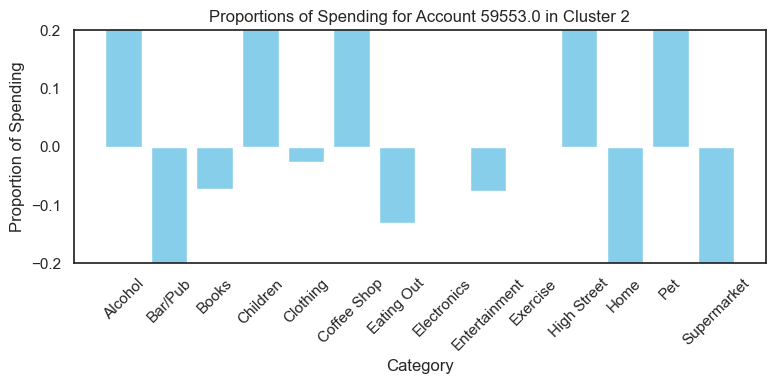

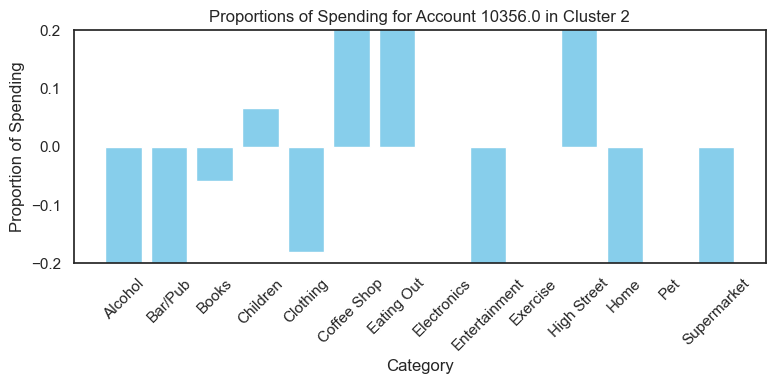

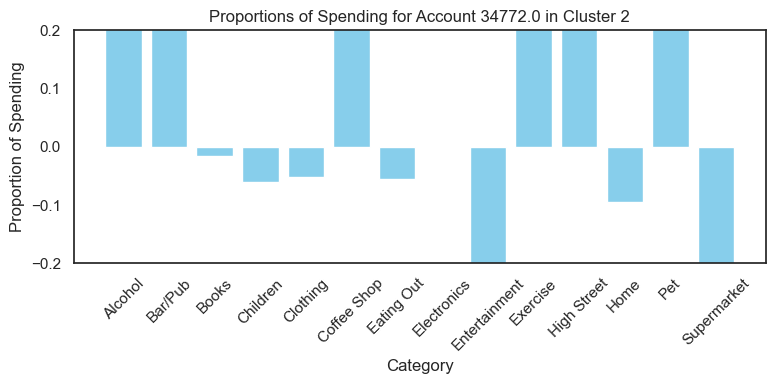

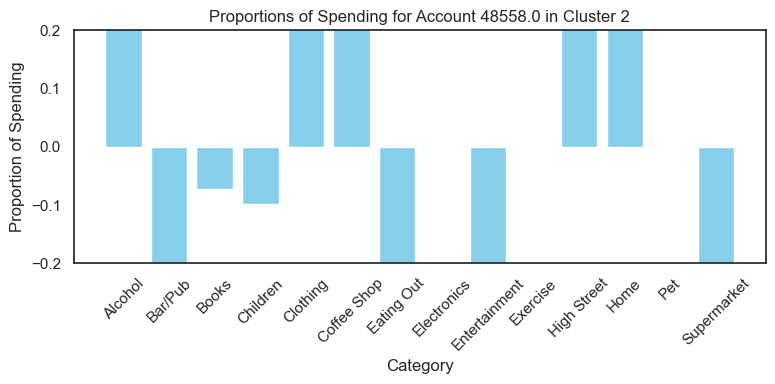

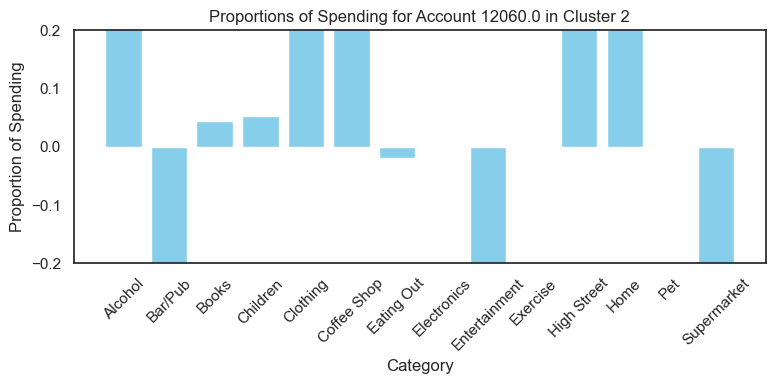

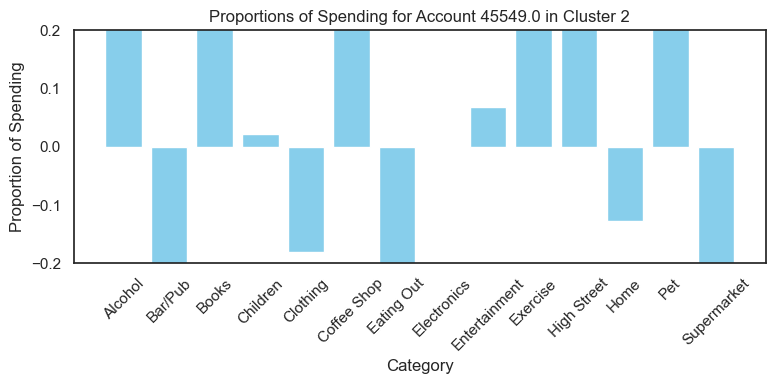

In [14]:
for account_name, account_data in sample_accounts.iterrows():
    plt.figure(figsize=(8, 4))
    plt.bar(account_data.index[:-1], account_data.values[:-1], color='skyblue')
    plt.title(f'Proportions of Spending for Account {account_name} in Cluster {cluster_of_interest}')
    plt.xlabel('Category')
    plt.ylabel('Proportion of Spending')
    plt.xticks(rotation=45)
    plt.ylim(-0.2, 0.2)
    plt.tight_layout()
    plt.show()

In [15]:
spending_data['Alcohol'].min()

-0.604383364701939

In [16]:
spending_data['cluster_label'].value_counts()

cluster_label
1    2681
4    1214
6    1208
3    1128
5     589
0     587
2     347
8     159
7     151
9      78
Name: count, dtype: int64

#### Clustering without UMAP

In [17]:
hdb = HDBSCAN(min_samples=1, min_cluster_size=250)

cluster_labels = hdb.fit_predict(X)

spending_data['cluster_label'] = cluster_labels

In [18]:
spending_data['cluster_label'].unique()

array([-1,  3,  2,  1,  4,  0], dtype=int64)

Plotting the proportions for some of the accounts in a cluster

In [19]:
cluster_of_interest = 1

accounts_in_cluster = spending_data[spending_data['cluster_label'] == cluster_of_interest]
sample_accounts = accounts_in_cluster.sample(n=3)


In [20]:
sample_accounts.set_index('Sender account', inplace=True)
sample_accounts

,Alcohol,Bar/Pub,Books,Children,Clothing,Coffee Shop,Eating Out,Electronics,Entertainment,Exercise,High Street,Home,Pet,Supermarket,cluster_label,cluster_name
Sender account,,,,,,,,,,,,,,,,
50515.0,1.335030,1.127516,0.039486,-0.098205,-0.180186,-0.943956,-0.424283,0.0,0.860020,0.0,5.176504,-0.149200,0.128239,-0.130238,1,Low Supermarket High Highstreet
29259.0,1.518173,0.134389,-0.034663,1.536552,0.253287,-0.233973,-0.648774,0.0,-0.216587,0.0,4.579434,-0.188484,0.000000,-0.336789,1,Low Supermarket High Highstreet
83926.0,-0.441394,0.109439,0.069699,-0.098205,1.952514,-0.924580,-0.938007,0.0,-0.716203,0.0,5.045094,0.620111,0.000000,-0.398385,1,Low Supermarket High Highstreet


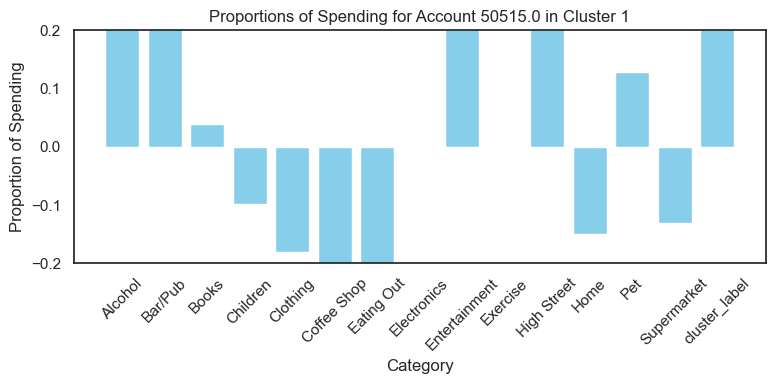

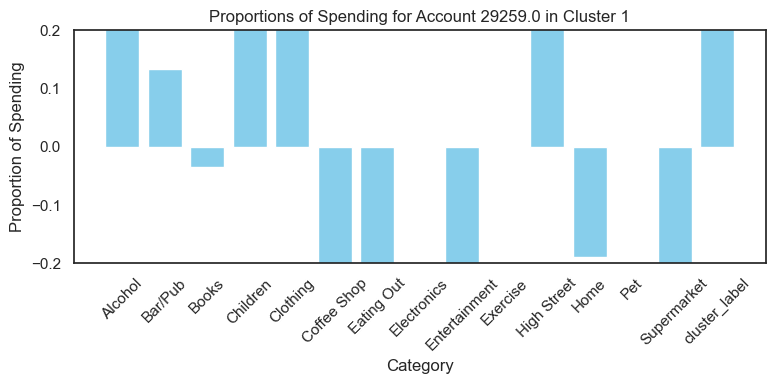

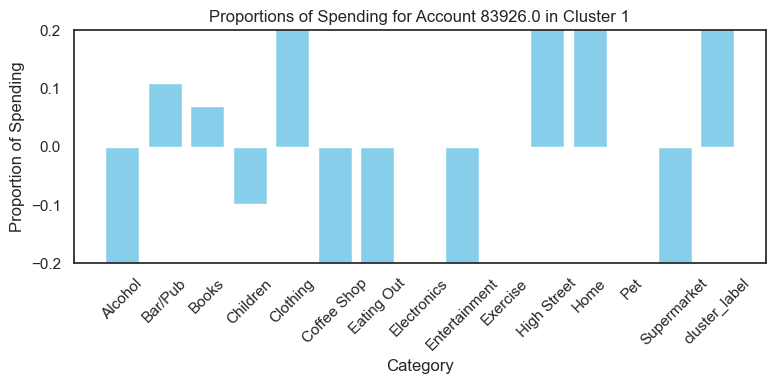

In [21]:
for account_name, account_data in sample_accounts.iterrows():
    plt.figure(figsize=(8, 4))
    plt.bar(account_data.index[:-1], account_data.values[:-1], color='skyblue')
    plt.title(f'Proportions of Spending for Account {account_name} in Cluster {cluster_of_interest}')
    plt.xlabel('Category')
    plt.ylabel('Proportion of Spending')
    plt.xticks(rotation=45)
    plt.ylim(-0.2, 0.2)
    plt.tight_layout()
    plt.show()

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

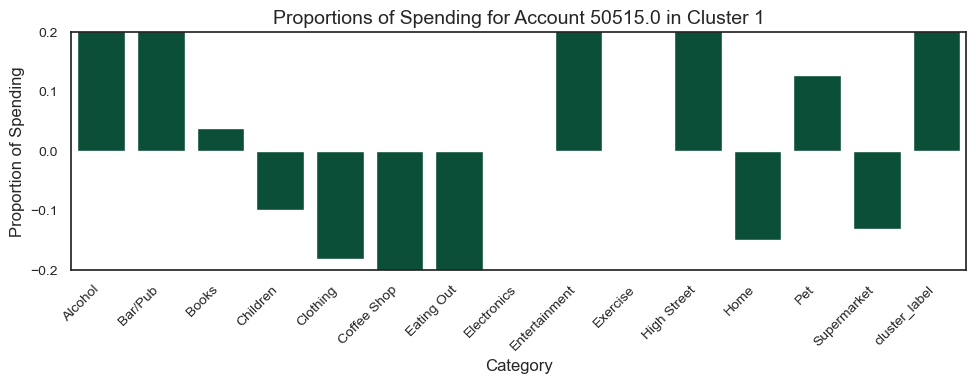

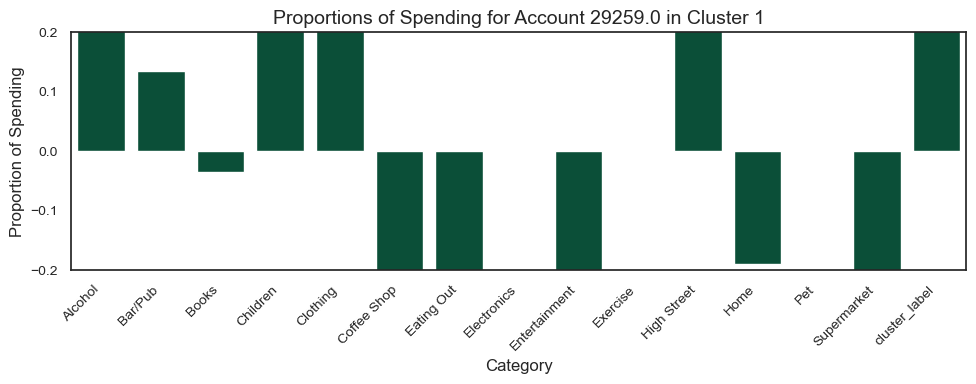

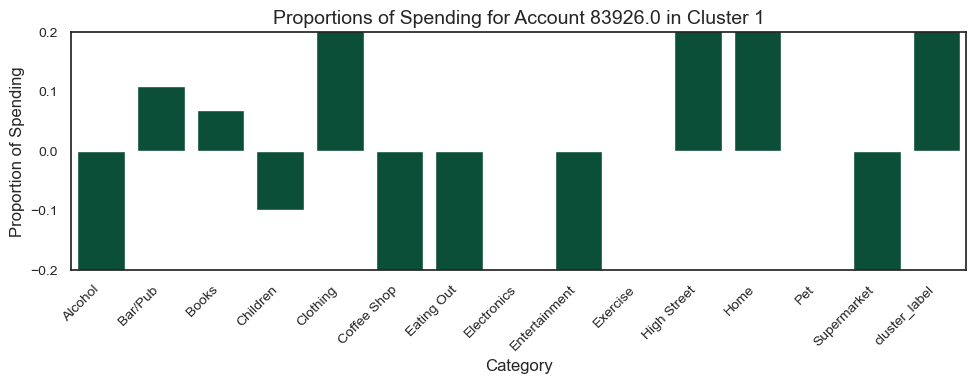

In [23]:
for account_name, account_data in sample_accounts.iterrows():
    plt.figure(figsize=(10, 4))
    ax = sns.barplot(x=account_data.index[:-1], y=account_data.values[:-1], color='#005a3c')
    plt.title(f'Proportions of Spending for Account {account_name} in Cluster {cluster_of_interest}', fontsize=14)
    plt.xlabel('Category', fontsize=12)
    plt.ylabel('Proportion of Spending', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.ylim(-0.2, 0.2)  # Adjust y-axis limits if needed
    plt.tight_layout()
    plt.show()

In [24]:
spending_data['cluster_label'].value_counts()

cluster_label
 3    3358
-1    1889
 4    1040
 1    1019
 0     519
 2     317
Name: count, dtype: int64